# Filtering the 35000 Text Files

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathlib import Path
from os import listdir

## Distribution of the Unique Word Count in all Texts

The first step was to retrieve the unique word count for each of the texts. We did this step in scala and saved it to a file.

(array([6.791e+03, 5.869e+03, 5.692e+03, 5.604e+03, 4.375e+03, 2.991e+03,
        1.709e+03, 9.690e+02, 5.920e+02, 2.700e+02, 1.540e+02, 1.140e+02,
        6.500e+01, 2.700e+01, 2.900e+01, 1.400e+01, 1.300e+01, 1.800e+01,
        1.000e+01, 1.300e+01, 8.000e+00, 9.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

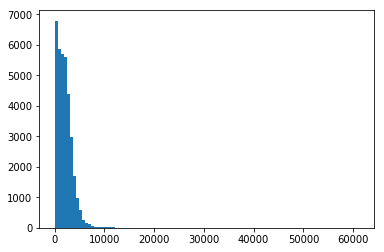

In [53]:
uniques = []
file = open(Path.cwd() / '../data/spark/uniqueWordCounts.txt', 'r')

for line in file:
    uniques.append(int(line.split(" ", 2)[1]))
    
file.close()
plt.hist(uniques, bins = 100)

## Distribution of Unique Word Counts Filtered Within 10 Standard Deviation of the Mean

Our first idea for filtering was to filter based on the mean of the unique number of words in each text file. However, the data is so skewed that even after allowing 10 standard deviations through, only aproximately 3000 texts made it through and they were uniformly distributed.

(array([64., 63., 57., 67., 56., 76., 69., 71., 57., 84., 84., 66., 75.,
        71., 57., 58., 59., 73., 63., 81., 76., 68., 63., 72., 63., 75.,
        52., 66., 69., 52., 63., 66., 58., 57., 66., 55., 76., 69., 68.,
        67., 64., 57., 70., 75., 65., 50., 71., 61., 52., 61., 74., 53.,
        59., 69., 61., 73., 72., 67., 64., 66., 77., 58., 47., 46., 64.,
        66., 73., 80., 64., 71., 57., 62., 60., 71., 49., 63., 73., 72.,
        60., 64., 67., 76., 47., 48., 78., 76., 49., 50., 52., 70., 74.,
        45., 68., 58., 59., 61., 64., 58., 67., 72.]),
 array([1646.  , 1652.76, 1659.52, 1666.28, 1673.04, 1679.8 , 1686.56,
        1693.32, 1700.08, 1706.84, 1713.6 , 1720.36, 1727.12, 1733.88,
        1740.64, 1747.4 , 1754.16, 1760.92, 1767.68, 1774.44, 1781.2 ,
        1787.96, 1794.72, 1801.48, 1808.24, 1815.  , 1821.76, 1828.52,
        1835.28, 1842.04, 1848.8 , 1855.56, 1862.32, 1869.08, 1875.84,
        1882.6 , 1889.36, 1896.12, 1902.88, 1909.64, 1916.4 , 1923.16,
        

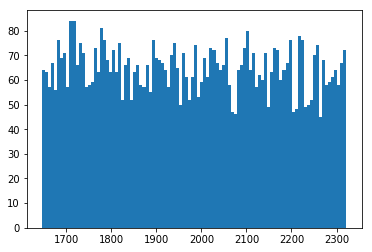

In [57]:
mean = sum(uniques)/len(uniques)
sd = (sum([abs(x - mean) for x in uniques])/len(uniques)) ** .5

top = mean + sd * 10
bot = mean - sd * 10

filtered_by_mean = [x for x in uniques if (x < top and x > bot)]

plt.hist(filtered_by_mean, bins = 100)

## Distribution of Unique Word Counts Filtered Visually

After deciding that filtering based on the mean would not work, we decided to filter visually by looking at bin counts in the original distribution. After trying a few different sized filters we settled on capping the unique word count at 8000 and requiring a minimum unique word count of 1500.

(array([647., 638., 622., 659., 660., 584., 647., 598., 605., 639., 608.,
        578., 581., 517., 537., 562., 472., 512., 449., 455., 454., 460.,
        397., 419., 387., 365., 358., 327., 312., 317., 274., 283., 269.,
        236., 244., 199., 181., 191., 187., 172., 151., 142., 120., 128.,
        104., 102., 107.,  88.,  90., 108., 105.,  88.,  79.,  81.,  72.,
         66.,  73.,  66.,  61.,  54.,  41.,  40.,  46.,  34.,  33.,  23.,
         22.,  30.,  23.,  16.,  25.,  20.,  13.,  28.,  15.,  21.,  10.,
         17.,  13.,  14.,  15.,  18.,  15.,  17.,  14.,   9.,  11.,   8.,
          6.,   6.,   4.,   9.,   8.,   5.,   5.,  10.,   5.,   8.,  10.,
          7.]),
 array([1501.  , 1565.91, 1630.82, 1695.73, 1760.64, 1825.55, 1890.46,
        1955.37, 2020.28, 2085.19, 2150.1 , 2215.01, 2279.92, 2344.83,
        2409.74, 2474.65, 2539.56, 2604.47, 2669.38, 2734.29, 2799.2 ,
        2864.11, 2929.02, 2993.93, 3058.84, 3123.75, 3188.66, 3253.57,
        3318.48, 3383.39, 3448.3 ,

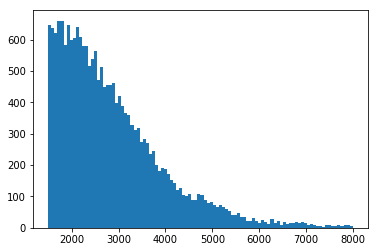

In [52]:
F = open(Path.cwd() / '../data/filtered_texts_listing.txt')
filtered_visually = [x for x in uniques if (x < 8000 and x > 1500)]
    
plt.hist(filtered_visually, bins = 100)

## Conclusion

With our final filtering we reduced the number of files from arround 35000 to arround 20000.